In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# read merged csv from local
df = pd.read_csv("/Users/apple/Documents/Visit_health_assessment/merged_dataset.csv")
df.head()

,response_id,user_id,question_id,response,created_at,type,title,text,options,score,user_name,sponsor_id,sponsor_name
0,2508505,1407131,40,start,2021-08-16 01:15:14,text_input,Start HRA,HRA Start,NaN,NaN,Swara Mehta,75,Sponsor 75
1,2508506,1407131,1,Female,2021-08-16 01:15:18,single_select,Basic Profile,Please mention your gender,Male,NaN,Swara Mehta,75,Sponsor 75
2,2508507,1407131,2,32,2021-08-16 01:15:23,text_input,Basic Profile,Please enter your age,NaN,NaN,Swara Mehta,75,Sponsor 75
3,2508508,1407131,3,65,2021-08-16 01:15:27,text_input,Basic Profile,Please enter you weight (in kgs),NaN,NaN,Swara Mehta,75,Sponsor 75
4,2508509,1407131,4,157,2021-08-16 01:15:35,text_input,Basic Profile,Please enter your height (in cms),NaN,NaN,Swara Mehta,75,Sponsor 75


/var/folders/8y/n9s51f5j22q1mr3tnjjq9lgw0000gn/T/ipykernel_829/187022742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=question_type_count.index,y=question_type_count.values,palette = "viridis")


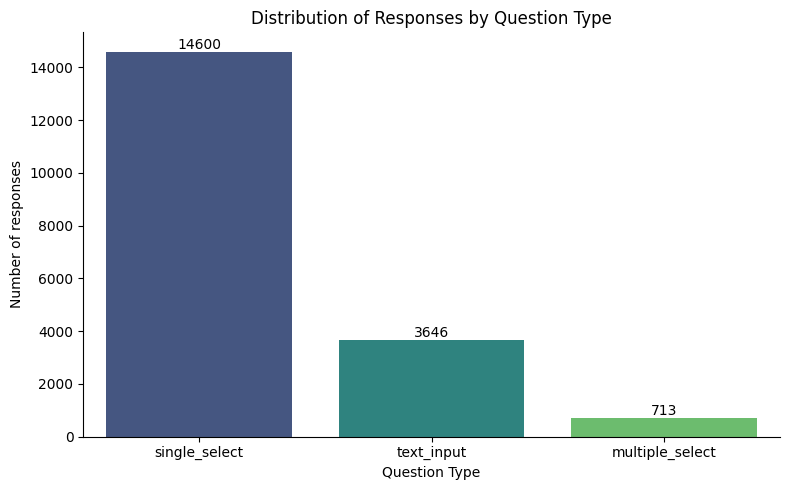

In [80]:
question_type_count= df['type'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=question_type_count.index,y=question_type_count.values,palette = "viridis")
# Add values on top of each bar
for container in plt.gca().containers:
    plt.bar_label(container)
plt.title("Distribution of Responses by Question Type")
plt.xlabel("Question Type")
plt.ylabel("Number of responses")
#plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

## INSIGHT :

The bar chart shows the distribution of responses based on different question types. 
It helps in understanding which question types are most commonly answered, aiding in resource allocation and question design focus.
1. We Observe that single_select questions are most answered.



/var/folders/8y/n9s51f5j22q1mr3tnjjq9lgw0000gn/T/ipykernel_829/725273045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_questionId.index,y=top_10_questionId.values,palette="magma")


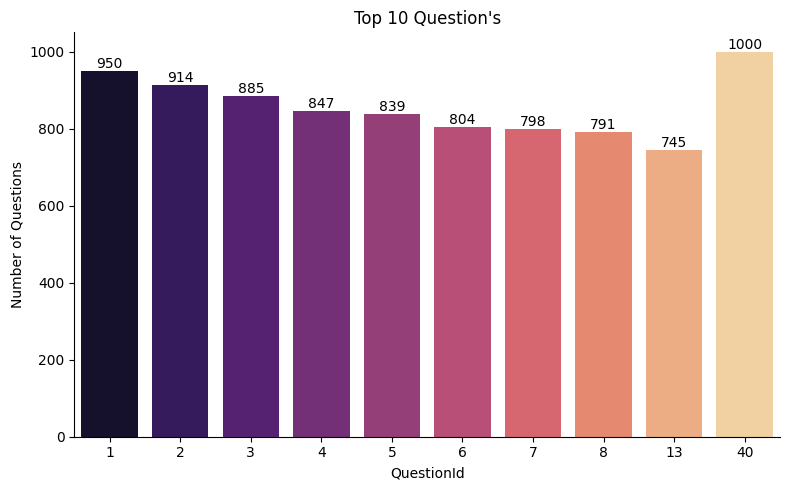

In [84]:


top_10_questionId = df['question_id'].value_counts().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_10_questionId.index,y=top_10_questionId.values,palette="magma")
for container in plt.gca().containers:
    plt.bar_label(container)
plt.title("Top 10 Question's")
plt.xlabel("QuestionId")
plt.ylabel("Number of Questions")
plt.tight_layout()
sns.despine()
plt.show()

## INSIGHT :
The bar chart highlights the most frequently answered questions. 
Identifying popular questions allows us to focus on these key areas for more detailed analysis.

1. We Observe Question_id 40 is most answered follwed by 1,2.

/var/folders/8y/n9s51f5j22q1mr3tnjjq9lgw0000gn/T/ipykernel_829/1303500370.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sponsors.index,y=top_sponsors.values,palette="Blues")


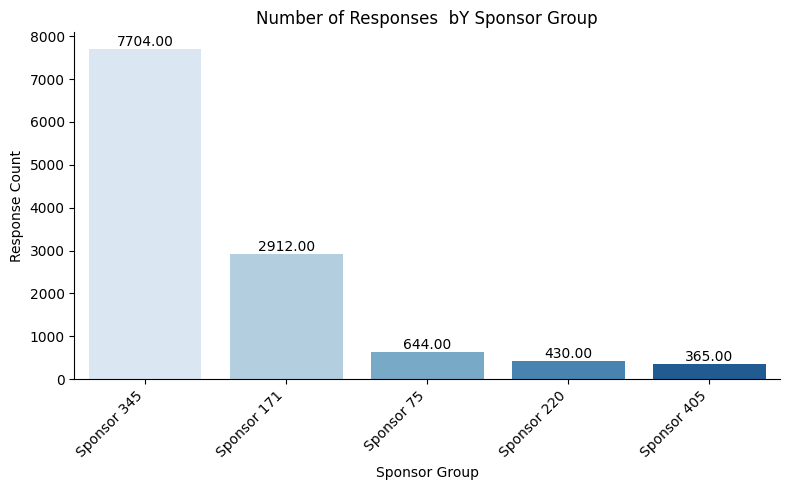

In [86]:


top_sponsors = df.groupby('sponsor_name')['score'].count().nlargest(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_sponsors.index,y=top_sponsors.values,palette="Blues")
plt.title("Number of Responses  bY Sponsor Group")
plt.xlabel("Sponsor Group")
plt.ylabel("Response Count")
plt.xticks(rotation=45, ha='right')
# Add values on top of each bar
for index, value in enumerate(top_sponsors.values):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')

plt.tight_layout()
sns.despine()
plt.show()

## INSIGHT :

The Plot shows the response count by each sponsor Group. 
1. we see that group Sponsor 345 has highest responses, indicating that they are welcoming
   to more health care options by sharing their medical status.

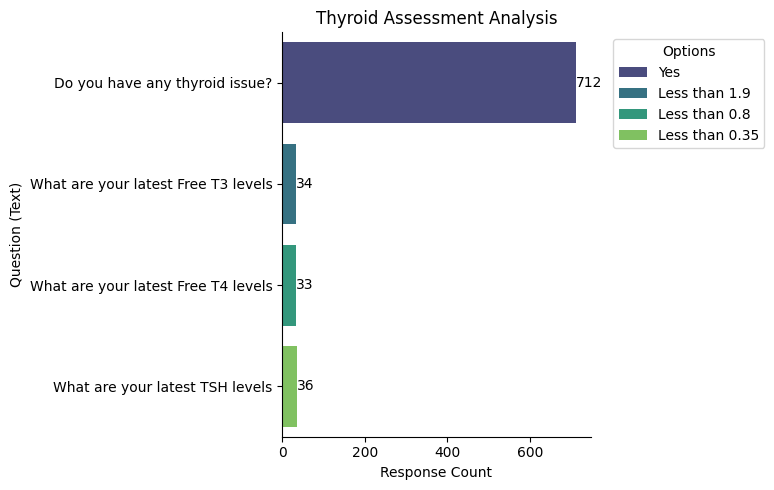

In [87]:


# Filter the data for rows where title is "Thyroid Assessment"
thyroid_data = df[df['title'] == "Thyroid Assessment"]

# Group by 'text' and 'options' columns and count occurrences
question_option_counts = thyroid_data.groupby(['text', 'options']).size().reset_index(name='count')

# Plot the data
plt.figure(figsize=(8, 5))
ax=sns.barplot(data=question_option_counts, x='count', y='text', hue='options', palette='viridis')
plt.title("Thyroid Assessment Analysis")
plt.xlabel("Response Count")
plt.ylabel("Question (Text)")
plt.legend(title="Options", bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
# Remove the outer border
sns.despine()
plt.show()


## INSIGHT :
A plot of responses for thyroid analysis is shown above.
1. 5% of respondents have reported TSH levels less than 0.35 which for adults is in range (0.27–4.2 uIU/mL)
2. 4% of respondents have reported Free T3 levels less than 1.9 is should be in range (2.3–4.2 pg/mL )


/var/folders/8y/n9s51f5j22q1mr3tnjjq9lgw0000gn/T/ipykernel_829/4148459307.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


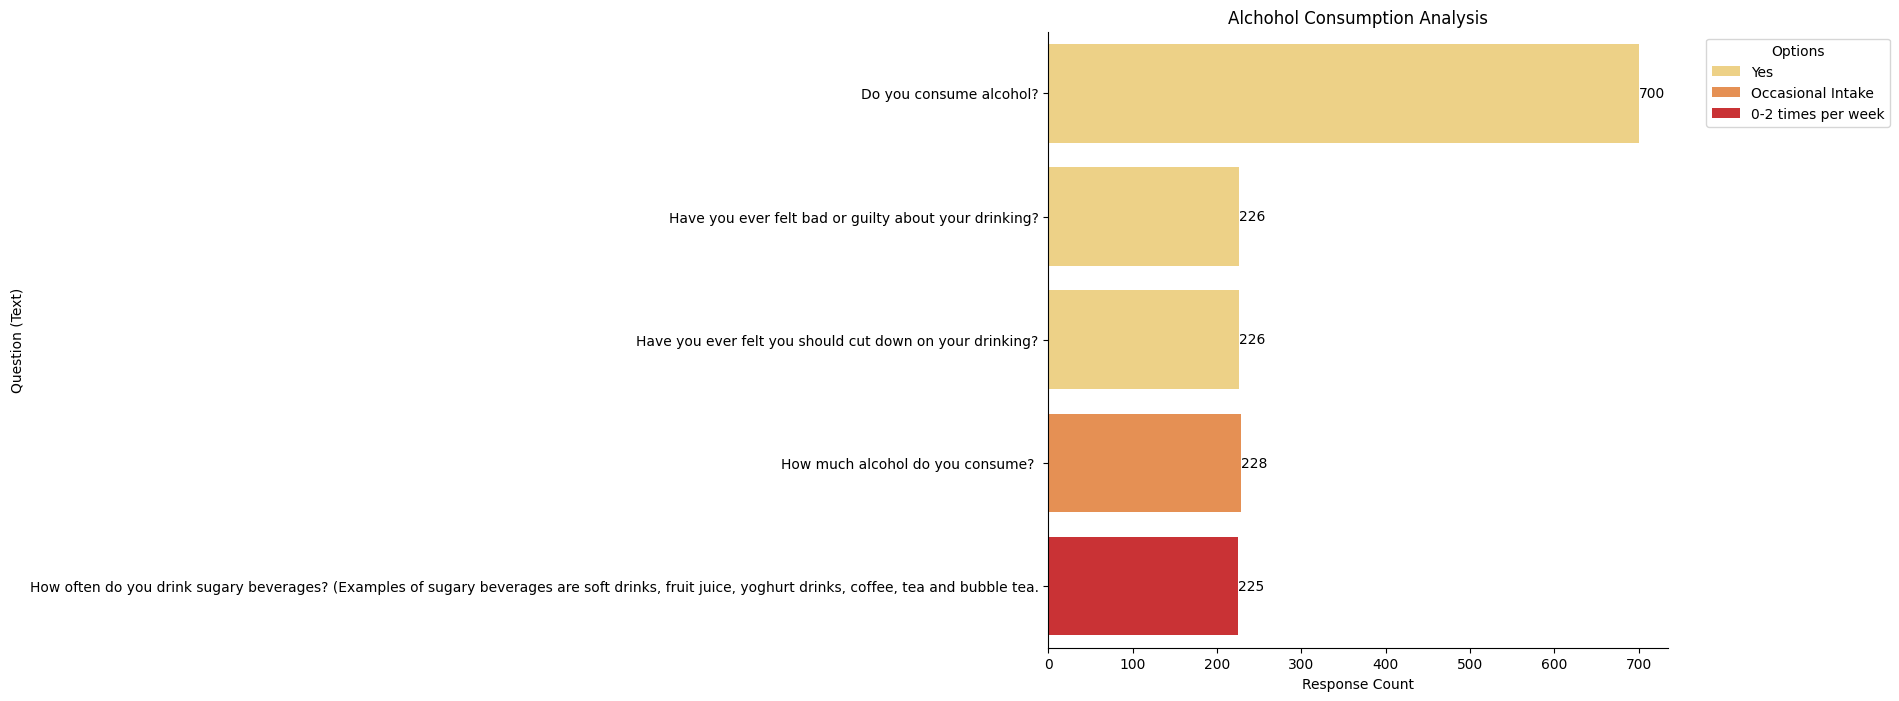

In [88]:

alchohol_assesment = df[df['title']=='Alcohol Assessment']
alchol_option_count = alchohol_assesment.groupby(['text','options']).size().reset_index(name='count')

plt.figure(figsize=(8,8))
ax=sns.barplot(data=alchol_option_count,x='count',y='text', hue='options', palette="YlOrRd")
plt.title("Alchohol Consumption Analysis")
plt.xlabel("Response Count")
plt.ylabel("Question (Text)")
plt.legend(title="Options", bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
# Remove the outer border
sns.despine()
plt.show()

## INSIGHT:

Exploratory analysis of Alchohol assesment shows that about
1. All respondents consume alchohol.
2. About 32% of respondents feel guilt and are wanting to cut_down their consuption.

/var/folders/8y/n9s51f5j22q1mr3tnjjq9lgw0000gn/T/ipykernel_829/1976703317.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


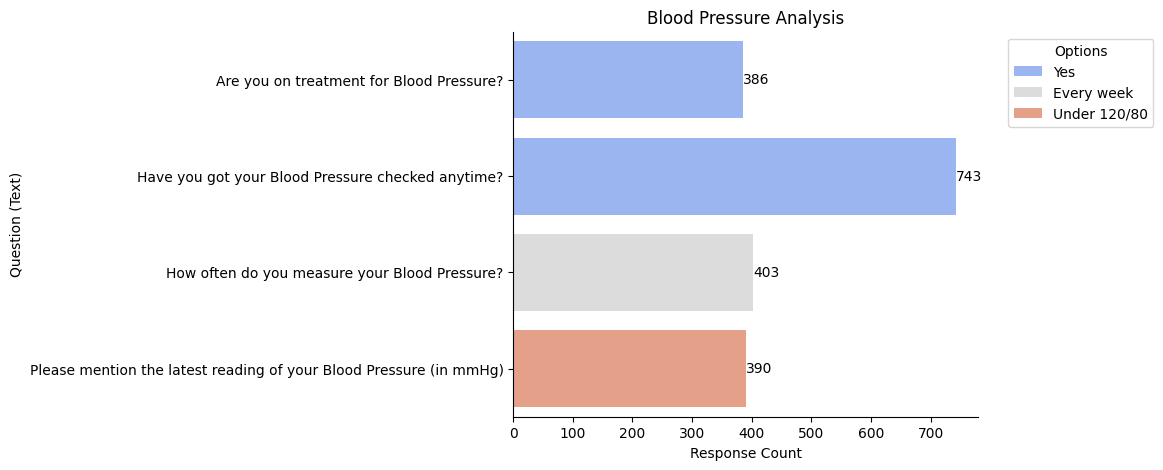

In [89]:

blood_pressure_assesment = df[df['title']=='Blood Pressure Assessment']
bp_option_count = blood_pressure_assesment.groupby(['text','options']).size().reset_index(name='count')

plt.figure(figsize=(6,5))
ax=sns.barplot(data=bp_option_count,x='count',y='text', hue='options', palette="coolwarm")
plt.title("Blood Pressure Analysis")
plt.xlabel("Response Count")
plt.ylabel("Question (Text)")
plt.legend(title="Options", bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
# Remove the outer border
sns.despine()
plt.show()

## INSIGHT:
From the Blood Pressure Analysis we observe that about
1. 52% of respondents agree to be on treatment for blood pressure.
2. 54% of respondents agree to measure their BP test once a week.

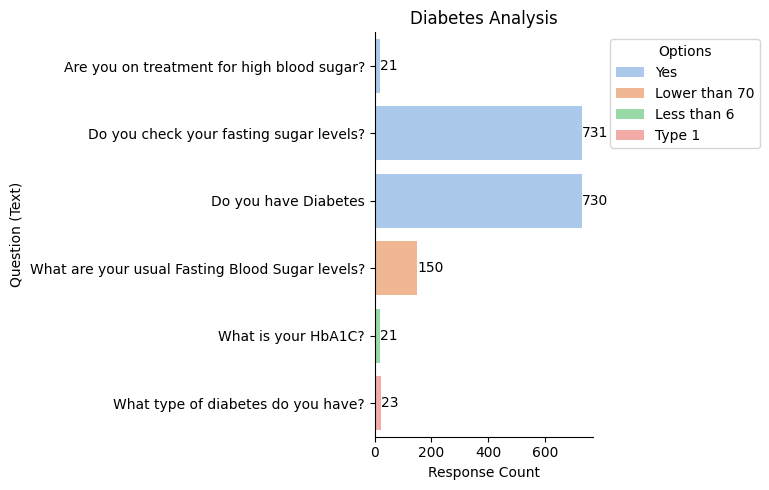

In [90]:

blood_pressure_assesment = df[df['title']=='Diabetes Assessment']
diabetes_option_count = blood_pressure_assesment.groupby(['text','options']).size().reset_index(name='count')

plt.figure(figsize=(8,5))
ax=sns.barplot(data=diabetes_option_count,x='count',y='text', hue='options', palette="pastel")
plt.title("Diabetes Analysis")
plt.xlabel("Response Count")
plt.ylabel("Question (Text)")
plt.legend(title="Options", bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
# Remove the outer border
sns.despine()
plt.show()

## INSIGHT:
The plot shows Diabetes Analysis:
1. We observe that 3% of respondents have reported to have to Type1 diabetes, others have neither responded or might be falling under other
   categories.
2. About 2% of respondents are under treatment for Hight blood Sugar.
   

/var/folders/8y/n9s51f5j22q1mr3tnjjq9lgw0000gn/T/ipykernel_829/3451624756.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


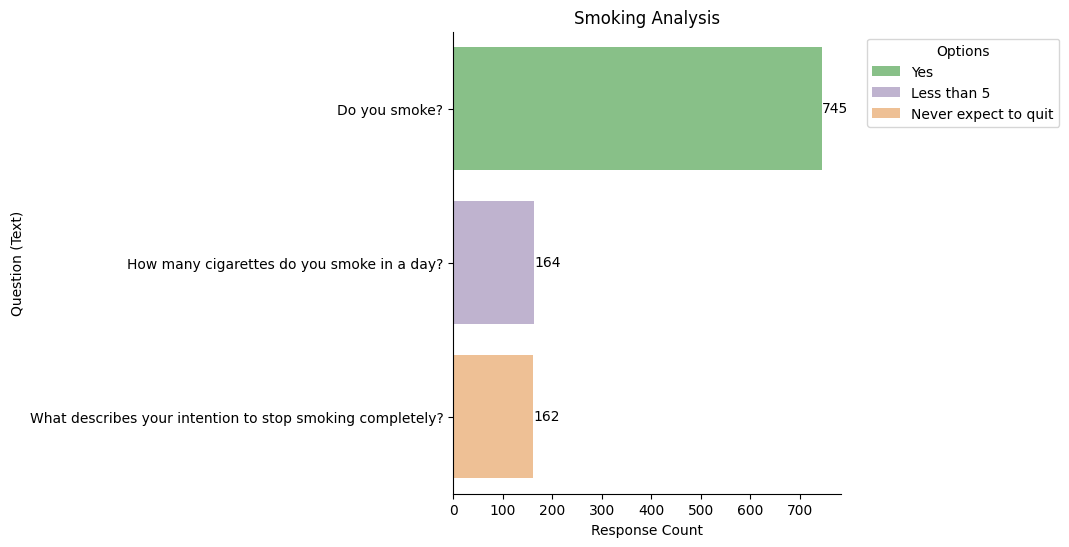

In [91]:

smoking_assesment = df[df['title']=='Smoking']
smoking_option_count = smoking_assesment.groupby(['text','options']).size().reset_index(name='count')

plt.figure(figsize=(5,6))
ax=sns.barplot(data=smoking_option_count,x='count',y='text', hue='options', palette="Accent")
plt.title("Smoking Analysis")
plt.xlabel("Response Count")
plt.ylabel("Question (Text)")
plt.legend(title="Options", bbox_to_anchor=(1.05, 1), loc='upper left')
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
# Remove the outer border
sns.despine()
plt.show()

## INSIGHT:
A plot representing Smoking Habits of Individuals
1. About 78% of respondents smoke more than 5 cigarettes daily.
2. 21% of respondents exibit no intension of quitting.